In [ ]:
# Para conocer el enunciado del problema, consultar el libro:
# Metodos Numericos Aplicados a la Ingeniería: Casos de estudio utilizando MATLAB (2014)
# por Héctor Jorquera y Claudio Gelmi
# 
# Código Python escrito por Claudio Gelmi, Ph.D.

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
# Sistema de tres ecuaciones no lineales
def prob2(c, tau):
    # Parámetros
    k1 = 1.0   # 1/min
    k2 = 0.1   # 1/min
    ca0 = 1.0  # mol/L

    # Ecuaciones
    eq1 = (ca0 - c[0])/tau - 2*k1*c[0]**2
    eq2 = -c[1]/tau + k1*c[0]**2 - k2*c[1]
    eq3 = -c[2]/tau + k2*c[1]
    return [eq1, eq2, eq3]

# Letra a)
print('- Letra a):')
c_a,_,_,mesg = fsolve(prob2, [1, 1, 1], args=(0.5,), xtol=1e-8, full_output=True)
print("Mensaje de convergencia:", mesg)
print("Solución para letra a):", np.round(c_a,3))

- Letra a):
Mensaje de convergencia: The solution converged.
Solución para letra a): [0.618 0.182 0.009]


In [5]:
# Letra b)
print()
print('- Letra b):')
i = 0; c0_b = [1, 1, 1]
tau = np.arange(0.1, 20, 0.01)
c_b = np.zeros((len(tau), 3))

for taui in tau:
    c_b[i, :] = fsolve(prob2, c0_b, args=(taui,), xtol=1e-8)
    c0_b = c_b[i, :]
    i += 1
    
# Calcula su valor máximo y respectivo tiempo
max_B = np.max(c_b[:, 1])
pos_B = np.argmax(c_b[:, 1])
tau_max_B = tau[pos_B]

print("Máxima concentración para B:", round(max_B,3))
print("Tiempo en alcanzar máximo:", round(tau_max_B,2), "minutos.")


- Letra b):
Máxima concentración para B: 0.257
Tiempo en alcanzar máximo: 2.68 minutos.


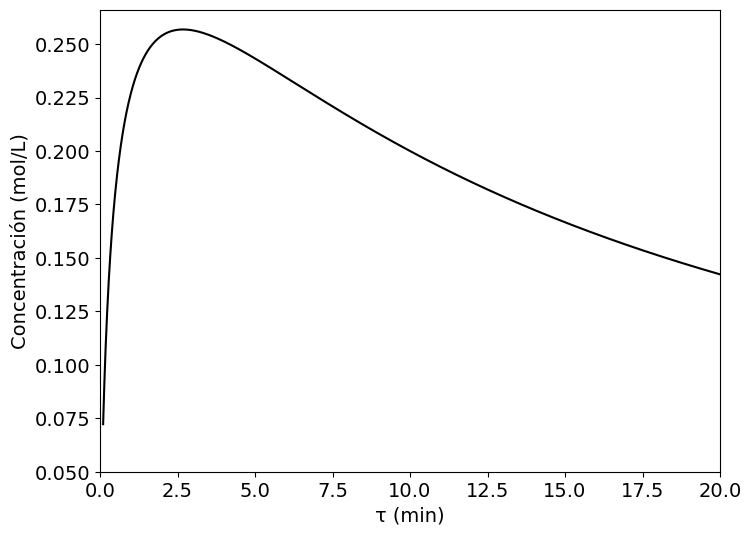

In [6]:
# Gráfico para letra b)
plt.figure(figsize=(8, 6))
plt.plot(tau, c_b[:, 1], 'k')
plt.xlabel('τ (min)', fontsize=14)
plt.xlim(0, 20)
plt.ylabel('Concentración (mol/L)', fontsize=14)
plt.ylim(0.05,)
plt.tick_params(axis='both', labelsize=14)
plt.show()